<a href="https://colab.research.google.com/github/jocelynandrade18/Repositorio2.-/blob/main/Clasificaci%C3%B3n_de_Candidatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np #
import pandas as pd

# Generar dataset sintético con diferentes rangos por habilidad
n_muestras = 5000
# Habilidades técnicas: 70-100 # segmentar por habilidades matemáticas tecnologicas
tec = np.random.randint(70, 101, (n_muestras, 6)) # Toma del numpy numero aleatorio entero entre 70 y 100, filas y columnas
# Habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6)) #Mide la cantidad de muestras 6
# Habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6)) # 6 habilidades tecnicas, matematicas y psicologicas
# Nombres de columnas
columnas = [ # queremos clasificar las columnas por nombre para ver cual de ellas sabe
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
# Crear DataFrame #Generar un DataFrame
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)

In [22]:
df

,python,sql,visualizacion_datos,excel,manejo_apis,nube,estadistica,probabilidad,algebra_lineal,calculo,optimizacion,modelado,trabajo_equipo,comunicacion,creatividad,adaptabilidad,liderazgo,resolucion_problemas
0,96,98,76,93,100,86,68,72,86,85,70,76,56,55,85,73,69,60
1,82,92,89,87,74,100,85,61,80,71,84,82,83,65,65,82,66,75
2,79,73,70,83,75,78,64,80,75,83,76,84,50,61,68,76,80,72
3,86,88,93,80,84,71,80,74,81,87,86,73,76,71,73,53,73,77
4,96,83,99,97,83,81,78,69,77,79,76,83,80,53,63,63,83,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,91,72,95,91,73,91,73,72,90,75,69,86,66,62,66,55,82,65
4996,91,95,99,99,92,77,78,83,75,63,70,65,76,56,70,80,73,59
4997,84,91,74,93,76,91,61,88,65,85,69,79,78,64,68,62,73,53
4998,84,94,86,94,94,99,71,63,72,83,75,86,50,63,83,78,73,81


obtenemos la etiqueta y

In [23]:
# Calcular promedio por grupo y promedio total #promediar las habilidades y decir si es apto para el trabajo
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1) #usamos pandas, escoger las habilidades tecnologicas axis 1 es por columna
prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)
# Promedio total = promedio de los 3 promedios
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3
# Etiqueta: 1 = apto si promedio total > 80
y = (prom_total > 75).astype(int) #designamos valores, mayor a 75
# one-hot encoding
y = pd.get_dummies(y).values

In [24]:
y #vector de clases apto/no apto

array([[False,  True],
       [False,  True],
       [ True, False],
       ...,
       [False,  True],
       [False,  True],
       [ True, False]])

Obtenemos los conjuntos de entrenamiento y de prueba.

In [25]:
from sklearn.model_selection import train_test_split # separa por bloque
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42 # 20% de porcentaje
)

# Escalamiento por la misma escala
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Red Neuronal**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
modelo = Sequential([ #Modelo Sequential
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'), # "X_train" se coloca siempre por si se llegan a agregar más habilidades
    Dense(32, activation='sigmoid'), # Capas ocultas de 32 "Relu"
    Dense(16, activation='relu'),
    Dense(2, activation='softmax') # 2 Coincide con la cantidad de clases que voy a tener, capa de salida 2 neutronas
]) # 18 columnas con parámetros de DataFrame

adam = Adam(learning_rate=0.001) # optimizador de 0.01 se puede cambiar
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy']) # Metrica se utiliza para evaluar la métrica y ver si tuvo un error

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenamiento

In [28]:
history = modelo.fit(
    X_train, y_train,
    epochs=50,
    batch_size=1,
    validation_data=(X_test, y_test),
    verbose=1 # Imprimir el batch
) # Solo toma 500 datos para cada época
# Train: accuaracy y loss, test: val_accuracy

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9843 - loss: 0.0826 - val_accuracy: 0.9720 - val_loss: 0.1040
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9920 - loss: 0.0232 - val_accuracy: 0.9710 - val_loss: 0.2120
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9869 - loss: 0.0447 - val_accuracy: 0.9620 - val_loss: 0.1338
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9884 - loss: 0.0267 - val_accuracy: 0.9700 - val_loss: 0.1153
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9934 - loss: 0.0218 - val_accuracy: 0.9770 - val_loss: 0.0852
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9899 - loss: 0.0203 - val_accuracy: 0.9720 - val_loss: 0.0799
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9918 - loss: 0.0206 - val_accuracy: 0.9760 - val_loss: 0.0980
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9958 - loss: 0

Evaluación

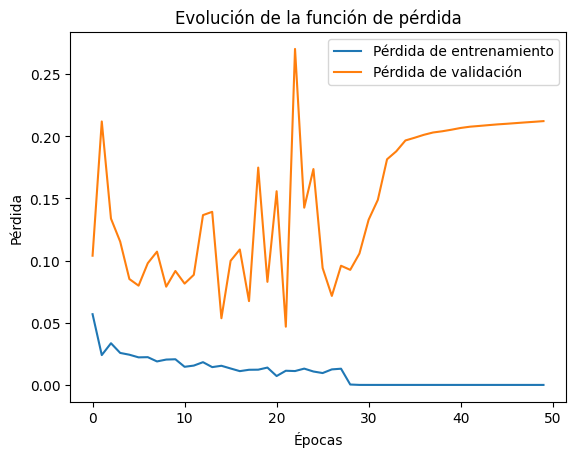

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9813 - loss: 0.2697

🔹 Loss: 0.2123  |  Accuracy: 0.9840


In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

loss, acc = modelo.evaluate(X_test, y_test)
print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")

Matriz de Confusión

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


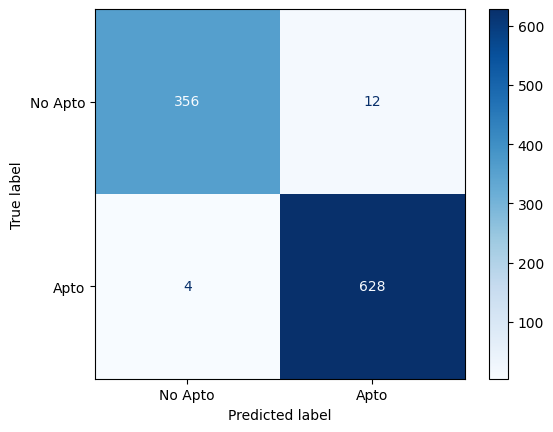


Sensitivity (Recall) por clase:
No Apto: 0.97
Apto: 0.99


In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")